# Proyecto Final Ciencia de Datos con Python 

## Estuardo Funes Solares Carné 20032042

### Importar paquetes para Proyecto

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!pip install scikit-learn

In [ ]:
import sklearn as sl

### Carga de Datos para Analizar

###### https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

In [17]:
df_training_data = np.load('./proyecto_training_data.npy')

In [31]:
df_training_data
### https://drive.google.com/file/d/1Y5vA7xxk68rjhon6_SJCIqhDn2mIyBZU/view?usp=sharing

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [21]:
df_training_data.shape

(1460, 6)

In [32]:
print (df_training_data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [34]:
df = pd.DataFrame (df_training_data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [36]:
print (df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


In [38]:
df.head(10)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


In [37]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### Análisis Exploratorio de Datos

In [327]:
df_datos_entrenamiento.isnull().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     206
dtype: int64

In [130]:
 df_datos_entrenamiento = df.sample(frac=0.8)

In [131]:
 df_datos_pruebas = df.sample(frac=0.2)

In [132]:
len(df_datos_entrenamiento)

1168

In [133]:
len(df_datos_pruebas)

292

In [137]:
df_datos_entrenamiento=df[0:1169]

In [138]:
df_datos_entrenamiento

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


In [43]:
df_datos_entrenamiento.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,963.000000
mean,180636.821215,6.100941,1156.391788,6.485885,1971.420017,69.998962
std,78798.021880,1.377438,373.627599,1.608522,29.957858,23.521322
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.000000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [134]:
df_datos_pruebas.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,251.000000
mean,183073.380137,6.133562,1210.226027,6.565068,1971.623288,70.494024
std,79563.013465,1.391915,464.241742,1.740723,30.701901,27.618308
min,39300.000000,1.000000,334.000000,2.000000,1880.000000,21.000000
25%,133000.000000,5.000000,901.750000,5.000000,1952.750000,60.000000
50%,166000.000000,6.000000,1115.500000,6.000000,1975.500000,68.000000
75%,214250.000000,7.000000,1476.500000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2009.000000,313.000000


In [50]:
df_datos_entrenamiento['SalePrice'].describe()

count      1169.000000
mean     180636.821215
std       78798.021880
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###### https://seaborn.pydata.org/generated/seaborn.distplot.html

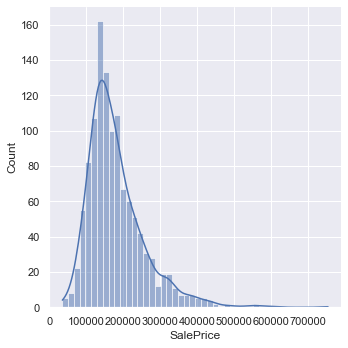

In [142]:
sns.displot(df_datos_entrenamiento['SalePrice'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [51]:
df_datos_entrenamiento['OverallQual'].describe()

count    1169.000000
mean        6.100941
std         1.377438
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

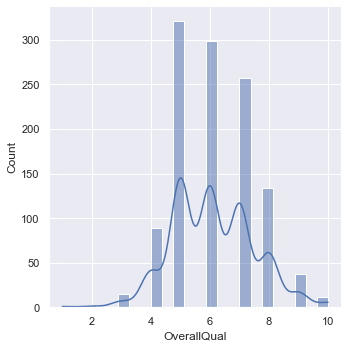

In [143]:
sns.displot(df_datos_entrenamiento['OverallQual'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [52]:
df_datos_entrenamiento['1stFlrSF'].describe()

count    1169.000000
mean     1156.391788
std       373.627599
min       334.000000
25%       882.000000
50%      1086.000000
75%      1390.000000
max      3228.000000
Name: 1stFlrSF, dtype: float64

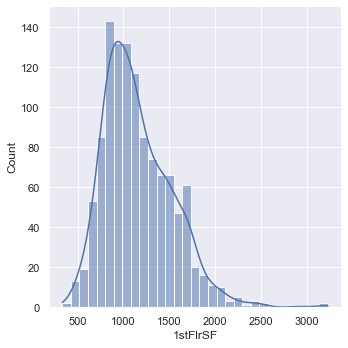

In [144]:
sns.displot(df_datos_entrenamiento['1stFlrSF'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [53]:
df_datos_entrenamiento['TotRmsAbvGrd'].describe()

count    1169.000000
mean        6.485885
std         1.608522
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

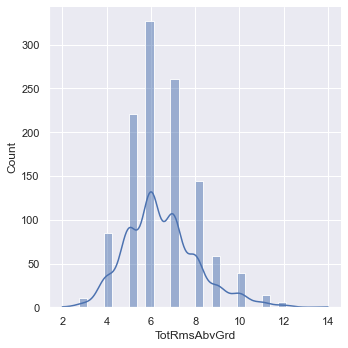

In [145]:
sns.displot(df_datos_entrenamiento['TotRmsAbvGrd'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [54]:
df_datos_entrenamiento['YearBuilt'].describe()

count    1169.000000
mean     1971.420017
std        29.957858
min      1875.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

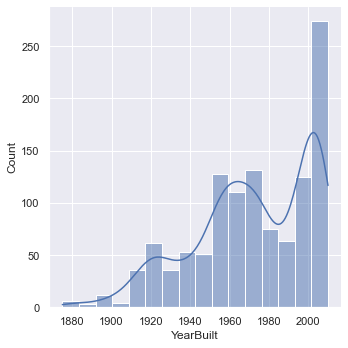

In [146]:
sns.displot(df_datos_entrenamiento['YearBuilt'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [55]:
df_datos_entrenamiento['LotFrontage'].describe()

count    963.000000
mean      69.998962
std       23.521322
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

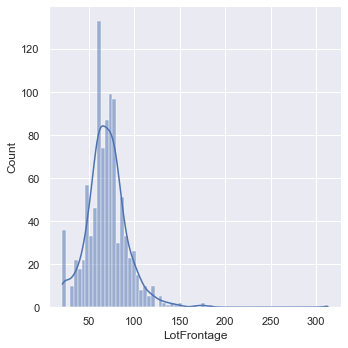

In [148]:
sns.displot(df_datos_entrenamiento['LotFrontage'],kde=True);
## La función sns.distplot será descontinuada, por eso se utiliza displot

In [46]:
df_datos_entrenamiento.ndim

2

In [47]:
df_datos_entrenamiento.shape

(1169, 6)

In [48]:
len(df_datos_entrenamiento.shape)

2

In [69]:
SalePrice_OverallQual = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['OverallQual']], axis=1)

In [70]:
SalePrice_OverallQual

,SalePrice,OverallQual
0,208500.0,7.0
1,181500.0,6.0
2,223500.0,7.0
3,140000.0,7.0
4,250000.0,8.0
...,...,...
1164,194000.0,5.0
1165,233170.0,7.0
1166,245350.0,8.0
1167,173000.0,6.0


Text(0.5, 1.0, '0.7937829677609731')

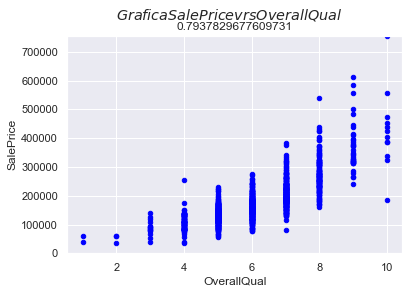

In [380]:
Correlacion1 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["OverallQual"])
SalePrice_OverallQual.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs OverallQual")
plt.suptitle('$\it{Grafica SalePrice vrs OverallQual}$')
plt.title(Correlacion[0,1])

In [83]:
SalePrice_1stFlrSF = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['1stFlrSF']], axis=1)

Text(0.5, 1.0, '0.6162769848463839')

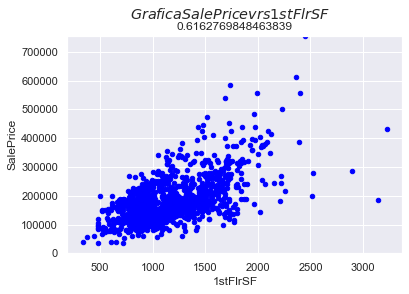

In [383]:
Correlacion2 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["1stFlrSF"])
SalePrice_1stFlrSF.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs 1stFlrSF")
plt.suptitle('$\it{Grafica SalePrice vrs 1stFlrSF}$')
plt.title(Correlacion2[0,1])

Text(0.5, 1.0, '0.5647560082444895')

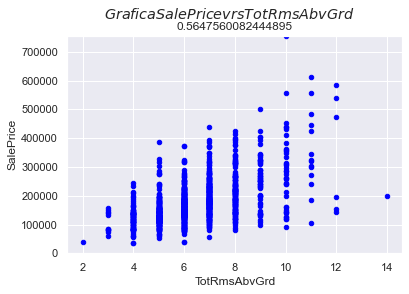

In [386]:
Correlacion3 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["TotRmsAbvGrd"])
SalePrice_TotRmsAbvGrd = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['TotRmsAbvGrd']], axis=1)
SalePrice_TotRmsAbvGrd.plot.scatter(x='TotRmsAbvGrd', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs TotRmsAbvGrd")
plt.suptitle('$\it{Grafica SalePrice vrs TotRmsAbvGrd}$')
plt.title(Correlacion3[0,1])

Text(0.5, 1.0, '0.5330047607874274')

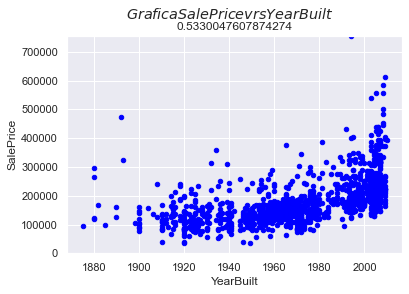

In [387]:
Correlacion4 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["YearBuilt"])
SalePrice_YearBuilt = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['YearBuilt']], axis=1)
SalePrice_YearBuilt.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs YearBuilt")
plt.suptitle('$\it{Grafica SalePrice vrs YearBuilt}$')
plt.title(Correlacion4[0,1])

Text(0.5, 1.0, 'nan')

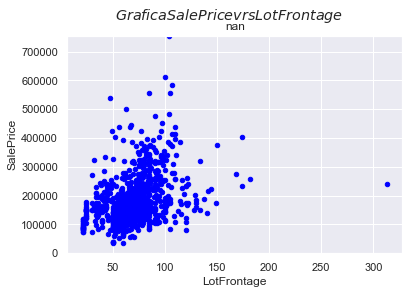

In [388]:
Correlacion5 = np.corrcoef(df_datos_entrenamiento["SalePrice"],df_datos_entrenamiento["LotFrontage"])
SalePrice_LotFrontage = pd.concat([df_datos_entrenamiento['SalePrice'], df_datos_entrenamiento['LotFrontage']], axis=1)
SalePrice_LotFrontage.plot.scatter(x='LotFrontage', y='SalePrice', ylim=(0,755000), color='Blue');
## Se coloca como ylim 755000 porque es el valor maximo del set de entrenamiento
#plt.title("Grafica SalePrice vrs LotFrontage")
plt.suptitle('$\it{Grafica SalePrice vrs LotFrontage}$')
plt.title(Correlacion5[0,1])

##### Coeficiente de Correlación

In [98]:
correlacion = df_datos_entrenamiento.corr()

In [99]:
correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793783,0.616277,0.564756,0.533005,0.363790
OverallQual,0.793783,1.000000,0.469388,0.444252,0.567029,0.241654
1stFlrSF,0.616277,0.469388,1.000000,0.409351,0.291662,0.416872
TotRmsAbvGrd,0.564756,0.444252,0.409351,1.000000,0.122495,0.340870
YearBuilt,0.533005,0.567029,0.291662,0.122495,1.000000,0.118610
LotFrontage,0.363790,0.241654,0.416872,0.340870,0.118610,1.000000


### Las 2 Variables con el Coeficiente de Correlación mayor son: 

#### 1.) SalePrice con OverallQual con: 
### **"0.7937"**
#### 2.) SalePrice con 1stFlrSF con: 
### **"0.6162"**

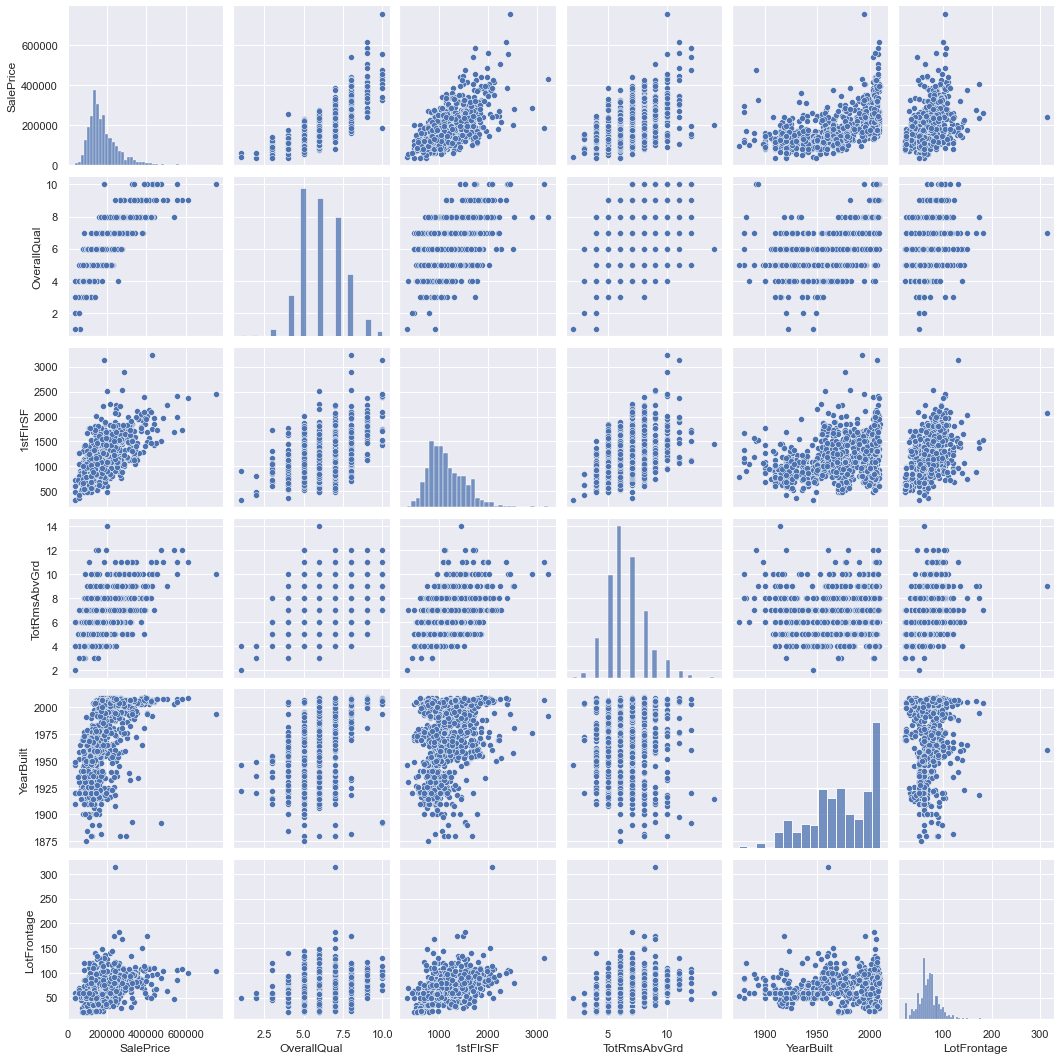

In [215]:
sns.set()
sns.pairplot(df_datos_entrenamiento, height = 2.5)
## Warning: The size parameter has been renamed to "height"
plt.show();

In [320]:
def regresion_lineal(*argumentos):
    epochs = 
    x1 = np.array(df_datos_entrenamiento["OverallQual"])
    x2 = np.array(df_datos_entrenamiento["1stFlrSF"])
    y = np.array(df_datos_entrenamiento["SalePrice"])
    iteraciones = int(epochs)
    Imprimir_error_cada = int
    Learning_rate = np.array()
    for i in range(iteraciones):
        y_hat = m*x + b
        gradient_m += -(2/N) * x1 * (y - y_hat)
        gradient_b += -(2/N) * (y - y_hat)
    m = 1
    b = 1
    
    print (y = m*x1 + b)
    

In [321]:
regresion_lineal (x1,y,1000,10,0.9)

NameError: name 'epochs' is not defined

In [307]:
x1 = df_datos_entrenamiento["OverallQual"]
x2 = df_datos_entrenamiento["1stFlrSF"]

In [308]:
x2

0        856.0
1       1262.0
2        920.0
3        961.0
4       1145.0
         ...  
1164    1432.0
1165    1502.0
1166    1694.0
1167     959.0
1168    1236.0
Name: 1stFlrSF, Length: 1169, dtype: float64

In [309]:
matriz1 = np.matrix(x1)
matriz1.shape

(1, 1169)

In [310]:
unos = np.ones((1169,))
unos.shape

(1169,)

In [311]:
unos

array([1., 1., 1., ..., 1., 1., 1.])

In [312]:
nueva_matriz = np.vstack((matriz1,unos))

In [313]:
np.hstack((x1,unos))

array([7., 6., 7., ..., 1., 1., 1.])

In [314]:
nueva_matriz

matrix([[7., 6., 7., ..., 8., 6., 6.],
        [1., 1., 1., ..., 1., 1., 1.]])

In [315]:
nueva_matriz.transpose()

matrix([[7., 1.],
        [6., 1.],
        [7., 1.],
        ...,
        [8., 1.],
        [6., 1.],
        [6., 1.]])

In [317]:
iteraciones = int(1000)
parametros = nueva_matriz
yhat = np.dot(iteraciones,parametros)

In [318]:
yhat

matrix([[7000., 6000., 7000., ..., 8000., 6000., 6000.],
        [1000., 1000., 1000., ..., 1000., 1000., 1000.]])

In [319]:
x100 = np.array(df_datos_entrenamiento["OverallQual"])
x100

array([7., 6., 7., ..., 8., 6., 6.])

In [325]:
def modelo_regresion (x,y,lr,epochs,imprimir_error_cada):
    m = 0
    b= 0
    imp = 0
    n = (len(x))
    e = int (epochs)
    n = float(len(x))
    for i in range(e):
        y_hat = m*x+b
        D_m = (-2/n) * sum(x*(y - y_hat))
        D_b = (-2/n) * sum(y - y_hat)
        m = m -lr*D_m
        b = b - lr*D_b
        if imp == imprimir_error_cada:
            print(m)
            imp=0
        imp+=0
    print ("La función de recta con mejor ajuste es: y= ",m,"x +",b)

In [326]:
modelo_regresion(x1,y,0.0001,100,20)

La función de recta con mejor ajuste es: y=  16394.415063298722 x + 2462.182706133399


In [ ]:
error = 1/2()